# Flatiron Phase 3 Seasonal Flu Vaccination Project with Flu_CatBoost-tuned-OptunaCVI

* Jonah Devoy
* Contact Me: <a href="www.linkedin.com/in/jonahdevoy"> Linkedin URL  </a>

### Features: 
For all binary variables: 0 = No; 1 = Yes.

* h1n1_concern - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

* h1n1_knowledge - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

* behavioral_antiviral_meds - Has taken antiviral medications. (binary)

* behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)

* behavioral_face_mask - Has bought a face mask. (binary)

* behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)

* behavioral_large_gatherings - Has reduced time at large gatherings. (binary)

* behavioral_outside_home - Has reduced contact with people outside of own household. (binary)

* behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)

* doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)

* doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)

* chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, 

* diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular 

* condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a 

* chronic illness. (binary)

* child_under_6_months - Has regular close contact with a child under the age of six months. (binary)

* health_worker - Is a healthcare worker. (binary)

* health_insurance - Has health insurance. (binary)

* opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

* opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

* opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

* opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

* opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

* opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

* age_group - Age group of respondent.

* education - Self-reported education level.

* race - Race of respondent.

* sex - Sex of respondent.

* income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.

* marital_status - Marital status of respondent.

* rent_or_own - Housing situation of respondent.

* employment_status - Employment status of respondent.

* hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of 

* Health and Human Services. Values are represented as short random character strings.

* census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

* household_adults - Number of other adults in household, top-coded to 3.

* household_children - Number of children in household, top-coded to 3.

* employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.

* employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

In [ ]:
# import necessary libraries

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

from ydata_profiling import ProfileReport
import missingno 
%matplotlib inline
# from IPython.display import Image
## import function needed for split
from sklearn.model_selection import train_test_split


## import classes necessary for building preprocessing pipelines
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import tree


from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
def calculate_null_percentage(df):  
    
 
    import pandas as pd
    
    missing_vals = pd.DataFrame()
    missing_vals['Number of Nulls'] = df.isna().sum()
    missing_vals['% Null'] = (df.isna().sum() / len(df)) * 100
    
    return missing_vals
    
    
def check_unique(df, col, dropna=False):   
    
  
    
    import pandas as pd
        
    unique_vals = pd.DataFrame(df[col].value_counts(dropna=dropna))
    
    return unique_vals

In [ ]:
# Loading in the data
df_1 = pd.read_csv('/work/Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines_-_Test_Features.csv', index_col='respondent_id')
features_df = pd.read_csv('/work/Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines_-_Training_Features.csv', index_col='respondent_id')
labels_df = pd.read_csv('/work/Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines_-_Training_Labels.csv', index_col='respondent_id')


In [ ]:
# observing the first 5 rows of the features dataframe 
features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,3.000,1.000,2.000,2.000,1.000,2.000,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.000,0.000,NaN,NaN
1,3.000,2.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,5.000,4.000,4.000,4.000,2.000,4.000,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.000,0.000,pxcmvdjn,xgwztkwe
2,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,1.000,0.000,0.000,NaN,3.000,1.000,1.000,4.000,1.000,2.000,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.000,0.000,rucpziij,xtkaffoo
3,1.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,NaN,3.000,3.000,5.000,5.000,4.000,1.000,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.000,0.000,NaN,NaN
4,2.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,NaN,3.000,3.000,2.000,3.000,1.000,4.000,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.000,0.000,wxleyezf,emcorrxb


In [ ]:
# observing the first 5 rows of the labels dataframe
labels_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [ ]:
# observing the first 5 rows of the test features dataframe
df_1.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26707,2.000,2.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,5.000,1.000,1.000,5.000,1.000,1.000,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.000,0.000,atmlpfrs,hfxkjkmi
26708,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,1.000,1.000,4.000,1.000,1.000,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.000,0.000,atmlpfrs,xqwwgdyp
26709,2.000,2.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,NaN,5.000,4.000,2.000,5.000,4.000,4.000,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.000,0.000,nduyfdeo,pvmttkik
26710,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,4.000,2.000,2.000,4.000,4.000,2.000,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.000,0.000,NaN,NaN
26711,3.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,5.000,2.000,4.000,4.000,4.000,2.000,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.000,1.000,fcxhlnwr,mxkfnird


In [ ]:
print(df_1.shape)
print(labels_df.shape)
print(features_df.shape)

(26708, 35)
(26707, 2)
(26707, 35)


In [ ]:
num_cols = features_df.select_dtypes('number').columns

In [ ]:
cat_cols = ['race', 'sex', 
       'marital_status', 'rent_or_own',  'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation']

In [ ]:
ord_cols = ['age_group', 'education',  'income_poverty',
        'employment_status']

In [ ]:
assert len(num_cols)+len(cat_cols)+len(ord_cols) == features_df.shape[1]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from category_encoders import OrdinalEncoder as oe
from catboost import CatBoostClassifier
from catboost import Pool, cv
from sklearn.metrics import roc_curve, roc_auc_score
import optuna

In [ ]:
# Categorical columns None
for col in (cat_cols+ord_cols):
    features_df[col] = features_df[col].fillna(value='None')

In [ ]:
for col in num_cols:
    features_df[col] = features_df[col].fillna(value=-1)

In [ ]:
# Categorical columns None
for col in (cat_cols+ord_cols):
    df_1[col] = df_1[col].fillna(value='None')

In [ ]:
for col in num_cols:
    df_1[col] = df_1[col].fillna(value=-1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( features_df, labels_df, test_size=0.3, random_state=42)


In [ ]:
categorical_features_indices = np.where(X_train.dtypes != float)[0]

In [ ]:
train_dataset = Pool(data=X_train,
                     label=y_train.h1n1_vaccine,
                     cat_features = categorical_features_indices)

In [ ]:
def objective(trial):
    param = {
        'iterations':trial.suggest_categorical('iterations', [100,200,300,500,1000,1200,1500]),
        'learning_rate':trial.suggest_float("learning_rate", 0.001, 0.3),
        'random_strength':trial.suggest_int("random_strength", 1,10),
        'bagging_temperature':trial.suggest_int("bagging_temperature", 0,10),
        'max_bin':trial.suggest_categorical('max_bin', [4,5,6,8,10,20,30]),
        'grow_policy':trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'min_data_in_leaf':trial.suggest_int("min_data_in_leaf", 1,10),
        'od_type' : "Iter",
        'od_wait' : 100,
        "depth": trial.suggest_int("max_depth", 2,10),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-8, 100),
         'one_hot_max_size':trial.suggest_categorical('one_hot_max_size', [5,10,12,100,500,1024]),
        'custom_metric' : ['AUC'],
        "loss_function": "Logloss",
        'auto_class_weights':trial.suggest_categorical('auto_class_weights', ['Balanced', 'SqrtBalanced']),
        }

    scores = cv(train_dataset,
            param,
            fold_count=5, 
            early_stopping_rounds=10,         
            plot=False, verbose=False)

    return scores['test-AUC-mean'].max()

In [ ]:
sampler = optuna.samplers.TPESampler(seed=42)  # Make the sampler behave in a deterministic way.
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=100)

Training on fold [3/5]

bestTest = 0.4314373739
bestIteration = 339

Training on fold [4/5]
[I 2023-08-17 14:20:27,273] Trial 61 finished with value: 0.8698353419016369 and parameters: {'iterations': 1200, 'learning_rate': 0.026218318258947056, 'random_strength': 1, 'bagging_temperature': 4, 'max_bin': 8, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 9, 'max_depth': 6, 'l2_leaf_reg': 1.482131687032444, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 44 with value: 0.8705095373159601.

bestTest = 0.4092849683
bestIteration = 295

Training on fold [0/5]

bestTest = 0.4286141895
bestIteration = 315

Training on fold [1/5]

bestTest = 0.419441392
bestIteration = 365

Training on fold [2/5]

bestTest = 0.4134210185
bestIteration = 397

Training on fold [3/5]

bestTest = 0.4321271324
bestIteration = 380

Training on fold [4/5]
[I 2023-08-17 14:20:45,363] Trial 62 finished with value: 0.8691966282036901 and parameters: {'iterations': 1200, 'learning_rate': 0.02

In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}={},".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.8705095373159601
  Params: 
    iterations=1200,
    learning_rate=0.009408039859647166,
    random_strength=1,
    bagging_temperature=4,
    max_bin=8,
    grow_policy=Depthwise,
    min_data_in_leaf=9,
    max_depth=6,
    l2_leaf_reg=9.902839364584828,
    one_hot_max_size=100,
    auto_class_weights=SqrtBalanced,


In [ ]:
final_model = CatBoostClassifier(verbose=False,  cat_features=categorical_features_indices, 
                          **trial.params)

In [ ]:
final_model.fit(X_train, y_train.h1n1_vaccine)

In [ ]:
predictions_h1 = final_model.predict_proba(X_test)


In [ ]:
predictions_h1 = predictions_h1[:,1].reshape(-1,1)


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


In [ ]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

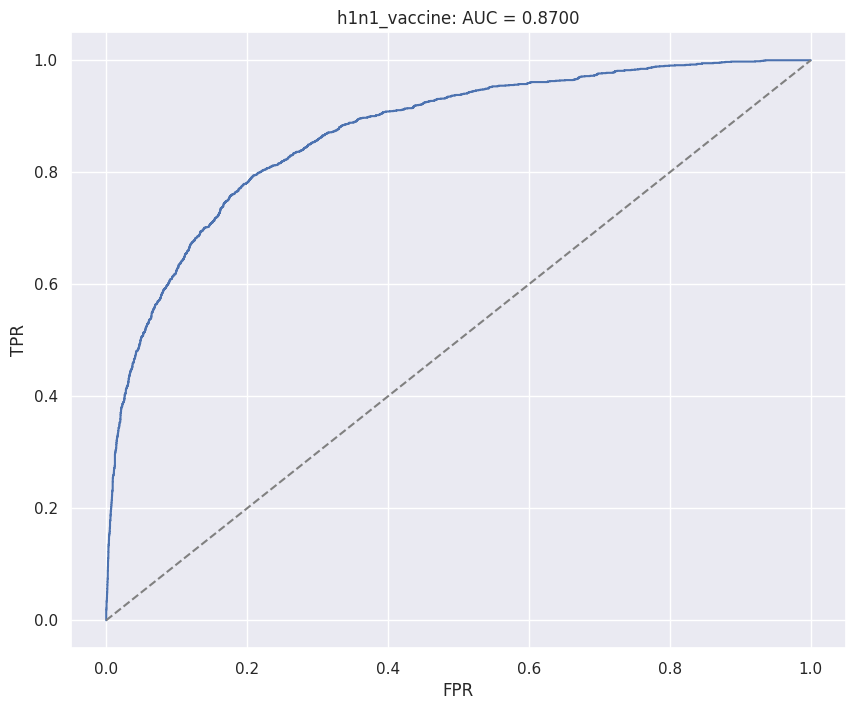

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_roc(
    y_test['h1n1_vaccine'], 
    predictions_h1, 
    'h1n1_vaccine',
    ax=ax
)

In [ ]:
roc_auc_score(y_test.h1n1_vaccine, predictions_h1)


0.8700256137998014

In [ ]:
train_dataset_se = Pool(data=X_train,
                     label=y_train.seasonal_vaccine,
                     cat_features = categorical_features_indices)

In [ ]:
def objective2(trial):
    param = {
        'iterations':trial.suggest_categorical('iterations', [100,200,300,500,1000,1200,1500]),
        'learning_rate':trial.suggest_float("learning_rate", 0.001, 0.3),
        'random_strength':trial.suggest_int("random_strength", 1,10),
        'bagging_temperature':trial.suggest_int("bagging_temperature", 0,10),
        'max_bin':trial.suggest_categorical('max_bin', [4,5,6,8,10,20,30]),
        'grow_policy':trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'min_data_in_leaf':trial.suggest_int("min_data_in_leaf", 1,10),
        'od_type' : "Iter",
        'od_wait' : 100,
        "depth": trial.suggest_int("max_depth", 2,10),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-8, 100),
         'one_hot_max_size':trial.suggest_categorical('one_hot_max_size', [5,10,12,100,500,1024]),
        'custom_metric' : ['AUC'],
        "loss_function": "Logloss",
        'auto_class_weights':trial.suggest_categorical('auto_class_weights', ['Balanced', 'SqrtBalanced']),
        }

    scores = cv(train_dataset_se,
            param,
            fold_count=5, 
            early_stopping_rounds=10,         
            plot=False, verbose=False) 

    return scores['test-AUC-mean'].max()

In [ ]:
sampler = optuna.samplers.TPESampler(seed=68)  # Make the sampler behave in a deterministic way.
study2 = optuna.create_study(direction="maximize", sampler=sampler)
study2.optimize(objective2, n_trials=100)

Training on fold [3/5]

bestTest = 0.4681399046
bestIteration = 381

Training on fold [4/5]
[I 2023-08-17 15:14:57,510] Trial 61 finished with value: 0.8625170938853307 and parameters: {'iterations': 1500, 'learning_rate': 0.034477309215127025, 'random_strength': 3, 'bagging_temperature': 4, 'max_bin': 10, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 4, 'max_depth': 6, 'l2_leaf_reg': 10.653699363240074, 'one_hot_max_size': 10, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 54 with value: 0.8628768048476074.

bestTest = 0.4553108645
bestIteration = 396

Training on fold [0/5]

bestTest = 0.4672496602
bestIteration = 314

Training on fold [1/5]

bestTest = 0.4635260182
bestIteration = 332

Training on fold [2/5]

bestTest = 0.4636832983
bestIteration = 327

Training on fold [3/5]

bestTest = 0.4693007623
bestIteration = 254

Training on fold [4/5]
[I 2023-08-17 15:15:34,499] Trial 62 finished with value: 0.86240488029695 and parameters: {'iterations': 1500, 'learning_rate': 0.04

In [ ]:
print("Number of finished trials: {}".format(len(study2.trials)))
print("Best trial:")
trial2 = study2.best_trial
print("  Value: {}".format(trial2.value))
print("  Params: ")
for key, value in trial2.params.items():
    print("    {}={},".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.8631025183234848
  Params: 
    iterations=1500,
    learning_rate=0.011926332327215398,
    random_strength=7,
    bagging_temperature=1,
    max_bin=8,
    grow_policy=Depthwise,
    min_data_in_leaf=7,
    max_depth=9,
    l2_leaf_reg=93.79761782210753,
    one_hot_max_size=10,
    auto_class_weights=SqrtBalanced,


In [ ]:
final_model_se = CatBoostClassifier(verbose=False,  cat_features=categorical_features_indices, 
                                    **trial2.params)

In [ ]:
final_model_se.fit(X_train, y_train.seasonal_vaccine)

In [ ]:
predictions_se = final_model_se.predict_proba(X_test)

In [ ]:
predictions_se = predictions_se[:,1].reshape(-1,1)

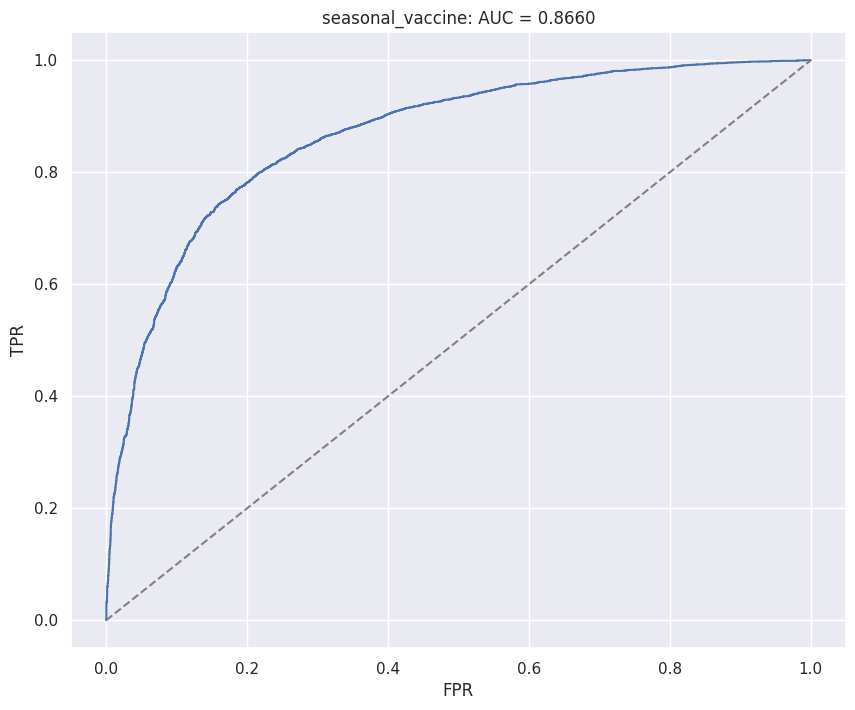

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_roc(
    y_test['seasonal_vaccine'], 
    predictions_se, 
    'seasonal_vaccine',
    ax=ax
)


In [ ]:
roc_auc_score(y_test.seasonal_vaccine, predictions_se)


0.8660111413909186

In [ ]:
roc_auc_score(y_test, np.hstack((predictions_h1, predictions_se)))

0.86801837759536

In [ ]:
train = X_train 
test = df_1

final_model_se.fit(train, y_test.seasonal_vaccine)
final_se = final_model_se.predict_proba(test)
final_se = final_se[:,1].reshape(-1,1)

train = X_train 
test = df_1

final_model_se.fit(train, labels_df.seasonal_vaccine)  
final_se = final_model_se.predict_proba(test)
final_se = final_se[:,1].reshape(-1,1)

CatBoostError: Length of label=8013 and length of data=18694 is different.

In [ ]:
final_model.fit(train, labels.h1n1_vaccine)

In [ ]:
final_h1 = final_model.predict_proba(test)
final_h1 = final_h1[:,1].reshape(-1,1)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=faff2ea2-6efd-4270-9bce-62cbee31bad7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>